In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("nfl_draft.csv")

In [3]:
from summarytools import dfSummary

In [4]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,column_a[object],1. 1990Anthony Thompson2. 1995James Stewart3. 1993Chad Brown4. 2005Alex Smith5. 2012Robert Griffin6. 1996Reggie Brown7. 1992Kevin Smith8. 1992Tony Smith9. 1990James Williams10. 1993Kevin Williams11. other,"2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)8,415 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,player_id[object],1. nan2. EricCr003. JackBo004. WinsJa005. DysoMa206. FlowLe207. WestDe208. StroWi209. YeboPh2010. PresRo0011. other,"1,219 (14.5%)2 (0.0%)2 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)7,205 (85.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD2UlEQVR4nO3cwW1iZxhG4e9ayBlvQAjJJSQ9uIgpdoqgiPRgWdzF2PGGLEbZZA2H4DxPAb9YHOkzEq+X8/k8UHi49Qfg/0NsZMRGRmxkxEZGbGTERkZsZMRGZpmZp5l5vMLbn+fz+f0K73KnNofD4ft2u91f+uF1Xd+WZfkhOP6x2W63+5eXl/fdbvdxqUdPp9O34/G4f319fZwZsTEzM5uZmd1u9/H8/Pzzwm8/Xfg97pwvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmYz8+v3Z5d89NLv8TVs1nV9Ox6P+7nw78/WdX2bmc9Lvsl9s0Egs/iXWVR8QSDzsCzLH8uy+IOeq3uYmd9n5rdbfxC+PmeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3Mw8z8OTN/3fqD8PXZIJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5TMMjNPM/N46w/Cf8bn+Xx+v8bDm8Ph8H273e6v8Tj3Z13Xt2VZflwjuM12u92/vLy873a7j0s/zn05nU7fjsfj/vX19XFmLh/bzMxut/t4fn7+eenHuUtP13rYFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYym5lfPy259Qfh9q7dwWZd17fj8bifK/60hPuxruvbzHxe420/C+ffrvazcOsqMr4gkBEbGbGRERsZsZERGxmxkREbGbGR+RsMKJ40FD+nyAAAAABJRU5ErkJggg=="">","1,219(14.5%)"
3,year[int64],Mean (sd) : 1999.2 (9.2)min < med < max:1985.0 < 1999.0 < 2015.0IQR (CV) : 16.0 (217.8),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC2klEQVR4nO3dsU8aYRjH8ecF0UPoXVCKG0tHkw4kLizdOvaP7drNQZPODl06uRgTgxCuEs6DLmUT4d5X6v2O72clr+8lfu/AhzfRLZdLA8qu9t4XAGzj4L0vANXhnGua2aHn8vlyuXxa9+LGUHe5OarD

In [5]:
percent_missing = df.isnull().sum() / len(df) * 100
print(percent_missing.round(2))

column_a              0.00
player_id            14.45
year                  0.00
rnd                   0.00
pick                  0.00
tm                    0.00
player                0.00
hof                   0.00
pos                   0.00
position_standard     0.00
first4av              0.00
age                  14.76
to                   16.38
ap1                   0.00
pb                    0.00
st                    0.00
carav                16.38
drav                 25.67
g                    16.78
cmp                  92.96
pass_att             92.96
pass_yds             92.96
pass_td              92.96
pass_int             92.96
rush_att             80.49
rush_yds             80.49
rush_tds             80.49
rec                  74.26
rec_yds              74.26
rec_tds              74.26
tkl                  51.26
def_int              80.84
sk                   52.02
college_univ         40.66
dtype: float64


In [6]:
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].fillna(False)


In [7]:
df.isnull().sum()

column_a             0
player_id            0
year                 0
rnd                  0
pick                 0
tm                   0
player               0
hof                  0
pos                  0
position_standard    0
first4av             0
age                  0
to                   0
ap1                  0
pb                   0
st                   0
carav                0
drav                 0
g                    0
cmp                  0
pass_att             0
pass_yds             0
pass_td              0
pass_int             0
rush_att             0
rush_yds             0
rush_tds             0
rec                  0
rec_yds              0
rec_tds              0
tkl                  0
def_int              0
sk                   0
college_univ         0
dtype: int64

In [8]:
import plotly.express as px

# To find which team has had the most draft picks overall, we can group the data by team and count the number of draft picks for each team

In [20]:
team_counts = df.groupby('tm').size().reset_index(name='count')
most_picks_team = team_counts.loc[team_counts['count'].idxmax(), 'tm']

print(f"The team with the most draft picks overall is {most_picks_team} with {team_counts['count'].max()} picks.")
fig = px.bar(team_counts, x='tm', y='count', title='Number of Draft Picks by Team')
fig.show()

The team with the most draft picks overall is NWE with 315 picks.


In [10]:
college_counts = df.groupby('college_univ')['player_id'].count().reset_index(name='count')

college_counts = college_counts.sort_values('count', ascending=False)


top_colleges = college_counts.head(20)


fig = px.bar(top_colleges, x='college_univ', y='count', title='Colleges/Universities with Most NFL Draft Picks')
fig.show()


In [11]:
import matplotlib.pyplot as plt

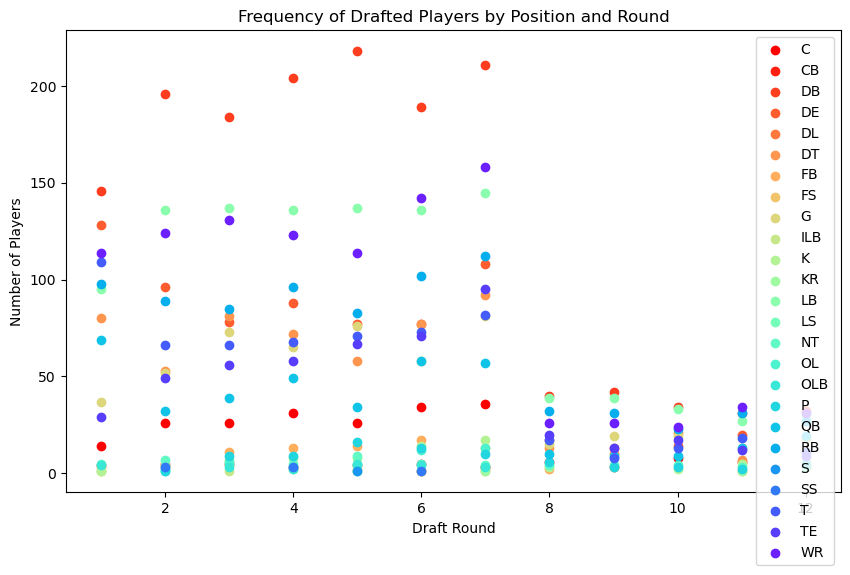

In [12]:
grouped = df.groupby(['pos', 'rnd'])['player_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(10,6))

positions = grouped['pos'].unique()
colors = plt.cm.rainbow_r(1.*np.arange(len(positions))/len(positions))

for i, pos in enumerate(positions):
    pos_data = grouped[grouped['pos'] == pos]
    ax.scatter(pos_data['rnd'], pos_data['player_id'], color=colors[i], label=pos)

ax.set_xlabel('Draft Round')
ax.set_ylabel('Number of Players')
ax.set_title('Frequency of Drafted Players by Position and Round')
ax.legend()

plt.show()

In [14]:

top_players = df.sort_values("carav", ascending=False).head(10)
print(top_players[["player", "position_standard", "college_univ", "carav"]])


              player position_standard   college_univ  carav
4332  Peyton Manning                QB      Tennessee  177.0
4023       Tom Brady                QB       Michigan  160.0
4838       Ray Lewis                LB     Miami (FL)  160.0
8114      Jerry Rice                WR    Florida St.  159.0
6130     Brett Favre                QB    Florida St.  156.0
8099     Bruce Smith                DE    Florida St.  148.0
3610      Drew Brees                QB         Purdue  147.0
5094  Derrick Brooks                LB    Florida St.  144.0
7440     Rod Woodson                DB    Florida St.  141.0
5317  Marshall Faulk                RB  San Diego St.  133.0


# Aggregate the career AVs by team and find the top 10 teams

In [15]:
team_av = df.groupby("tm")["carav"].sum().reset_index()
top_teams = team_av.sort_values("carav", ascending=False).head(10)
print(top_teams)

     tm        carav
25  PIT  6025.428754
11  GNB  5828.638310
8   DAL  5535.257337
19  NWE  5507.295477
30  SFO  5120.428754
3   BUF  5054.047781
29  SEA  5035.638310
16  MIA  4983.466894
23  PHI  4971.981143
13  IND  4953.704948


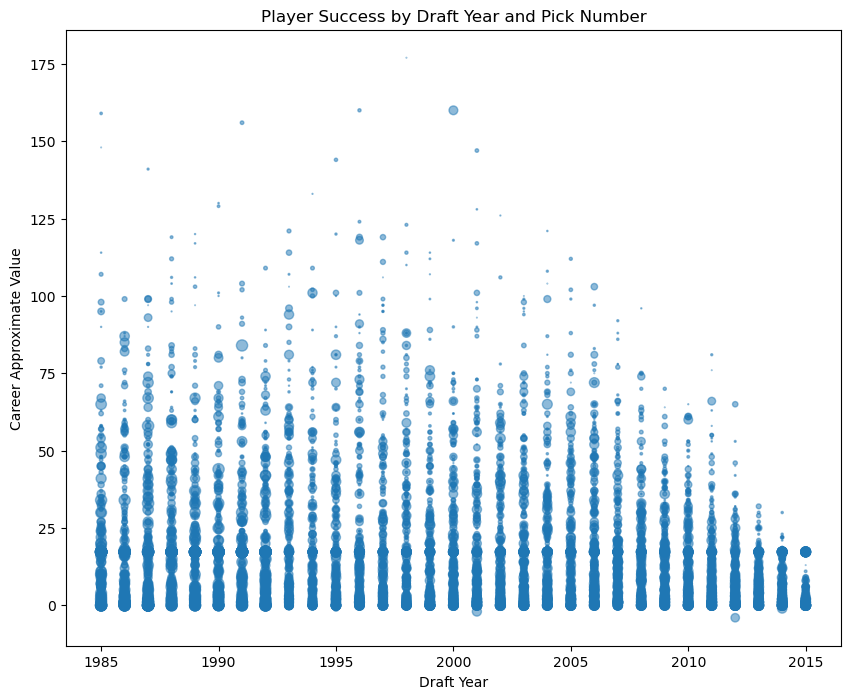

In [16]:
plt.figure(figsize=(10,8))
x = df['year']
y = df['carav']
size = df['pick'] / 5
plt.scatter(x, y, s=size, alpha=0.5)
plt.xlabel('Draft Year')
plt.ylabel('Career Approximate Value')
plt.title('Player Success by Draft Year and Pick Number')
plt.show()


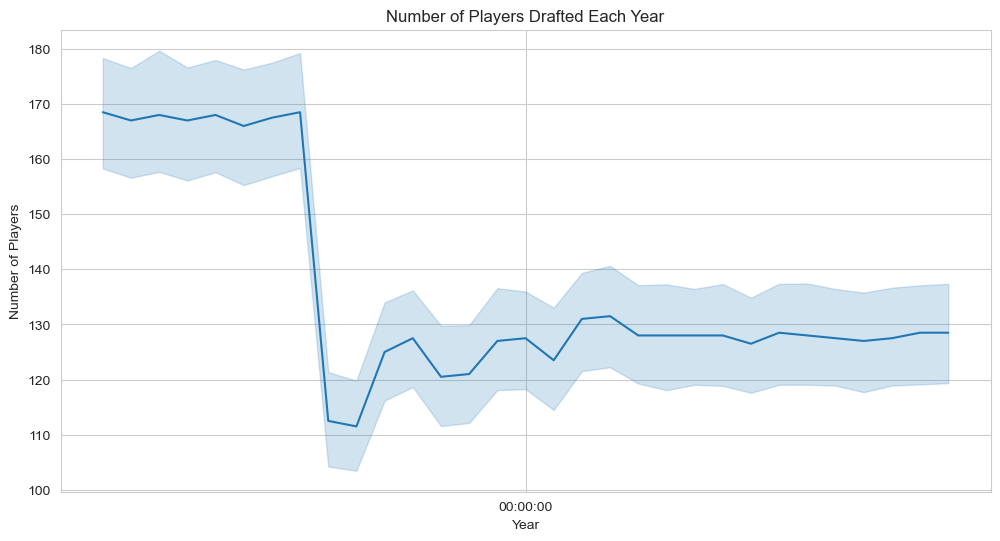

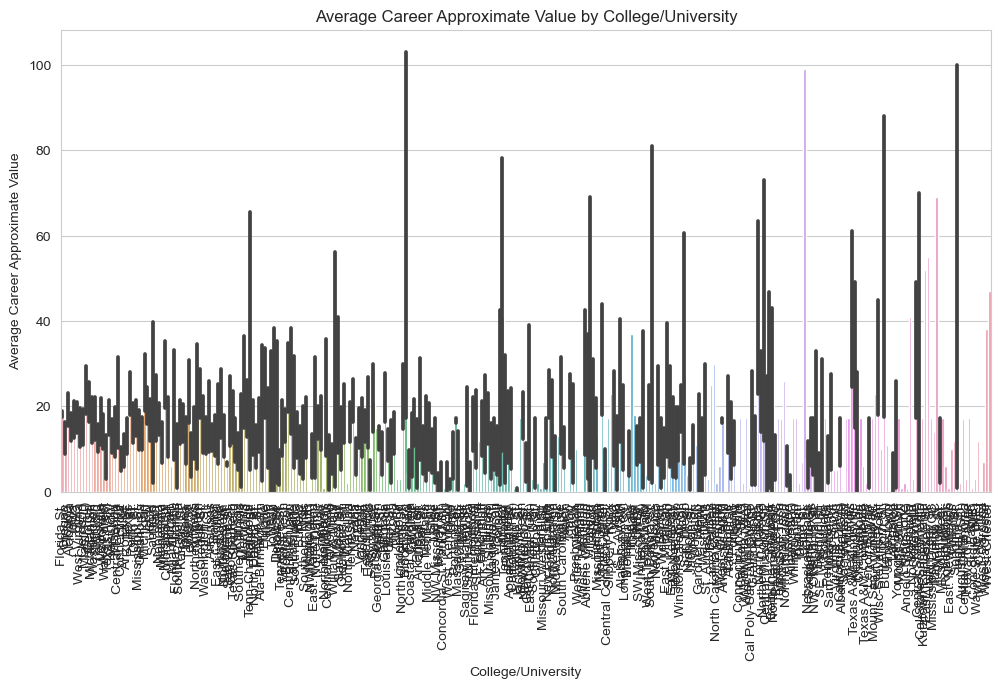

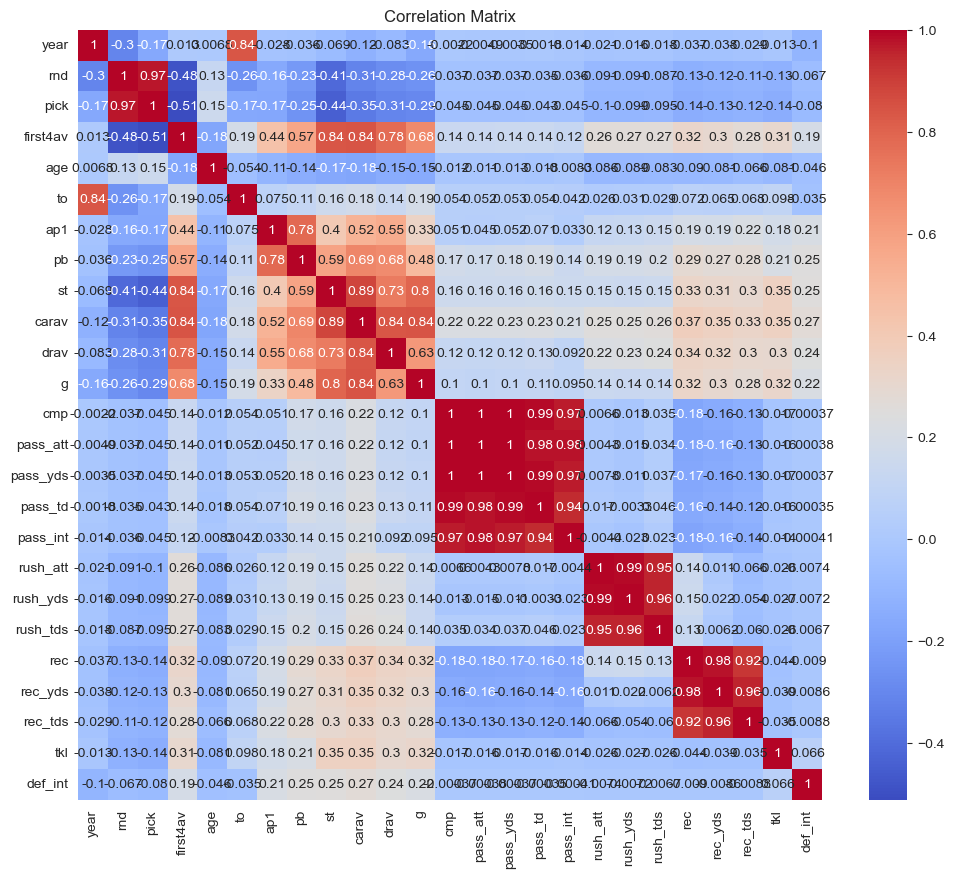

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'])

# Create a line plot of the number of players drafted each year
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='pick')
plt.title('Number of Players Drafted Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.show()

# Create a bar plot of the average career approximate value (carav) by college/university
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='college_univ', y='carav')
plt.title('Average Career Approximate Value by College/University')
plt.xlabel('College/University')
plt.xticks(rotation=90)
plt.ylabel('Average Career Approximate Value')
plt.show()

# Create a heat map of the correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
